In [1]:
import tensorflow as tf
from tensorflow import keras
# flatten will transform our multi-dimentional to dimentional model 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_data_dir="C:/Users/oubelkas fatima/Desktop/bump detection/SpeedBumpDetection/bump_detection_new/train_data"
validation_data_dir="C:/Users/oubelkas fatima/Desktop/bump detection/SpeedBumpDetection/bump_detection_new/validation_data"
img_width=224
img_height=224
batch_size=20

In [10]:
datagen=ImageDataGenerator(rescale=1.0/255)

In [11]:
train_data_gen=datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['not_existing_bump','existing_bump'],
                                           class_mode='binary')
validation_data_gen=datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['not_existing_bump','existing_bump'],
                                           class_mode='binary')

Found 810 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [12]:
train_data_gen.class_indices


{'not_existing_bump': 0, 'existing_bump': 1}

In [13]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
# sequential model means that the layers are going to be stacked up in the sequence  
model=Sequential()
# we use 64 of features or filters 
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(img_width,img_height,3)))
# we are using (3,3) size filter 
model.add(MaxPool2D(3,3))


model.add(Flatten())
# number of neurons we want to keep in that layer  in this case 128
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
# number of output layer in this case 1 AND segmoind because it is a binary classification 
model.add(Dense(1,activation="sigmoid"))


In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               44859520  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [26]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit_generator(train_data_gen,steps_per_epoch=len(train_data_gen),epochs=20,validation_data=validation_data_gen
                            ,validation_steps=len(validation_data_gen))

Epoch 1/50


C:\Users\OUBELK~1\AppData\Local\Temp/ipykernel_14256/646880906.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data_gen,steps_per_epoch=len(train_data_gen),epochs=50,validation_data=validation_data_gen


26/26 [==============================] - 90s 3s/step - loss: 5.6588 - accuracy: 0.4926 - val_loss: 0.6731 - val_accuracy: 0.5366
Epoch 2/50
26/26 [==============================] - 65s 2s/step - loss: 0.6525 - accuracy: 0.6198 - val_loss: 0.5991 - val_accuracy: 0.7780
Epoch 3/50
26/26 [==============================] - 60s 2s/step - loss: 0.5108 - accuracy: 0.7494 - val_loss: 0.4835 - val_accuracy: 0.7756
Epoch 4/50
26/26 [==============================] - 60s 2s/step - loss: 0.4441 - accuracy: 0.8099 - val_loss: 0.4500 - val_accuracy: 0.7610
Epoch 5/50
26/26 [==============================] - 60s 2s/step - loss: 0.3060 - accuracy: 0.8815 - val_loss: 0.4113 - val_accuracy: 0.7805
Epoch 6/50
26/26 [==============================] - 66s 3s/step - loss: 0.2635 - accuracy: 0.9000 - val_loss: 0.4536 - val_accuracy: 0.7854
Epoch 7/50
26/26 [==============================] - 66s 3s/step - loss: 0.1831 - accuracy: 0.9321 - val_loss: 0.3890 - val_accuracy: 0.8098
Epoch 8/50
26/26 [=============

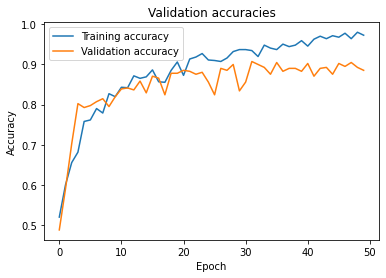

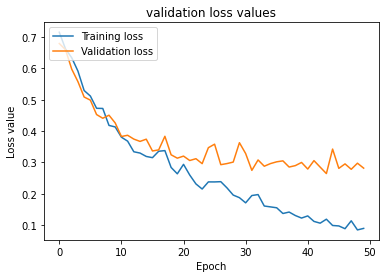

In [13]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()
     

In [1]:
model.save("model.h5")

NameError: name 'model' is not defined

In [3]:
mod = tf.keras.models.load_model("model.h5")

In [4]:
from tensorflow.keras.preprocessing import image


In [13]:
img=image.load_img("C:/Users/oubelkas fatima/Desktop/bump detection/SpeedBumpDetection/img/5223.jpg",target_size=(224,224))
#plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
img = np.expand_dims(img, axis=0) 
img_class = mod.predict(img)
img_class = img_class > 0.5

if(img_class == 0):
    imag = 'bump doesn\'t exist'
else :
    imag ='bump exist'
    
print("d'après le modèle :", imag)

1/1 [==============================] - 0s 98ms/step
d'après le modèle : bump doesn't exist


In [18]:
import cv2
import tensorflow as tf

# Load the trained model
 

# Start the camera
camera = cv2.VideoCapture(0)

while True:
    # Capture an image from the camera
    ret, image = camera.read()
    
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    
    # Use the model to make a prediction
    prediction = mod.predict(image)
    
    # Display the prediction on the screen
    #cv2.putText(image, str(prediction), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
    cv2.imshow("Prediction", image)
    
    # Check for user input to stop the program
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

# Release the camera
camera.release()


1/1 [==============================] - 0s 104ms/step


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'


In [2]:
import cv2
print(cv2.__version__)

4.6.0


In [16]:
import numpy as np

# Create a NumPy array
a = np.array([[1, 2, 3], [4, 5, 6]])

In [17]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
max_indices = np.argmax(a)
print(max_indices)  # Output: [1 1 1]